# BM20A6100 Advanced Data Analysis and Machine Learning
# Exercise: Nonlinear Dimensionality Reduction

# *2. Visualizing with SOM (3 points)*

Visualize MNIST-784 handwritten digits dataset with SOM and discuss what you can learn from the visualization.

## Libraries import

In [1]:
import pandas as pd
import numpy as np

from scipy.io import arff
from sklearn.model_selection import train_test_split

from SOM import *

## Load data

Loading the MNIST dataset from an ARFF file, decodes the class labels, and normalizes pixel values to [0, 1]. Then it standardizes the features using per-feature mean and standard deviation. Finally, it creates a stratified subset of 7,000 samples for further processing and prints the sizes of the original and reduced datasets.

In [2]:
mnist_data, mnist_meta = arff.loadarff('mnist_784.arff')

df = pd.DataFrame(mnist_data)
df['class'] = df['class'].str.decode('utf-8').astype(int)
X_original = df.drop(columns=['class']).to_numpy(dtype=np.float32) / 255
y_original = df['class'].to_numpy(dtype=np.int64)

# Standardize
mean = np.mean(X_original, axis=0)
std_dev = np.std(X_original, axis=0)
X = np.divide(
    X_original - mean,
    std_dev,
    out=np.zeros_like(X_original, dtype=float),
    where=std_dev != 0
)

print("Original dataset size:", X_original.shape, y_original.shape)

subset_size = 7000
test_size = 1 - subset_size / len(X_original)

X, _, y, _ = train_test_split(
    X_original, y_original,
    test_size=test_size,
    stratify=y_original,
    random_state=42
)

print("Subset dataset size:", X.shape, y.shape)

Original dataset size: (70000, 784) (70000,)
Subset dataset size: (7000, 784) (7000,)


## Fit SOM

Initializes a Self-Organizing Map (SOM) using the SimpSOM library. A SOMSimpsomInterface is created with a 20×20 map, 1000 training iterations, and an initial learning rate of 0.3. The SOM network uses PCA-based weight initialization to align the initial neuron weights with the major variance directions of the high-dimensional MNIST data, which speeds up convergence and improves topological preservation. The cosine distance metric is used because it focuses on the angular similarity between input vectors rather than their magnitude, making it well-suited for high-dimensional image data where pixel intensity patterns are more relevant than absolute brightness.

In [3]:
som = SOMSimpsomInterface(rows=20, cols=20, n_iterations=1000, learning_rate=0.3)
som.fit(X)

2025-10-31 12:11:03.444 | INFO     | simpsom.network:__init__:118 - Square topology.
2025-10-31 12:11:03.445 | WARNING  | simpsom.network:_set_weights:178 - Please make sure that the data have been standardized before using PCA.
2025-10-31 12:11:03.445 | INFO     | simpsom.network:_set_weights:180 - The weights will be initialized with PCA.
2025-10-31 12:11:04.146 | INFO     | simpsom.network:train:374 - The map will be trained with the batch algorithm.
2025-10-31 12:11:04.158 | DEBUG    | simpsom.network:train:494 - Training SOM... 0.00%


Training SOM (20x20) for 1000 iterations...


2025-10-31 12:11:23.686 | DEBUG    | simpsom.network:train:494 - Training SOM... 1.00%
2025-10-31 12:11:43.236 | DEBUG    | simpsom.network:train:494 - Training SOM... 2.00%
2025-10-31 12:12:02.326 | DEBUG    | simpsom.network:train:494 - Training SOM... 3.00%
2025-10-31 12:12:21.571 | DEBUG    | simpsom.network:train:494 - Training SOM... 4.00%
2025-10-31 12:12:41.117 | DEBUG    | simpsom.network:train:494 - Training SOM... 5.00%
2025-10-31 12:13:00.308 | DEBUG    | simpsom.network:train:494 - Training SOM... 6.00%
2025-10-31 12:13:19.561 | DEBUG    | simpsom.network:train:494 - Training SOM... 7.00%
2025-10-31 12:13:38.889 | DEBUG    | simpsom.network:train:494 - Training SOM... 8.00%
2025-10-31 12:13:58.264 | DEBUG    | simpsom.network:train:494 - Training SOM... 9.00%
2025-10-31 12:14:17.629 | DEBUG    | simpsom.network:train:494 - Training SOM... 10.00%
2025-10-31 12:14:37.065 | DEBUG    | simpsom.network:train:494 - Training SOM... 11.00%
2025-10-31 12:14:56.310 | DEBUG    | simp

Training complete.


## Visualise SOM

The figure below shows the projection of the MNIST dataset onto a trained Self-Organizing Map (SOM) with a 20×20 grid. Each cell represents one neuron, and each colored dot corresponds to a sample (a handwritten digit) mapped to its Best Matching Unit (BMU). The color of each dot indicates the digit class (0–9), as shown in the legend.

The map reveals clear clusters of similar digits, where samples of the same class tend to group together in localized regions. For example, digit 9 (pink) dominates the right part of the map, while 1 (green) and 2 (yellow) occupy distinct areas. This indicates that the SOM captured the underlying structure of the dataset and organized similar patterns close to each other in the two-dimensional space.

Some classes, such as 3, 5, and 8, are more dispersed across the map, suggesting higher intra-class variance among these digits. In particular, digit 8 shares characteristics with several other classes due to its symmetric and rounded shape, which makes it more prone to overlap and confusion with digits such as 3, 5, and 9. The smooth transitions between clusters demonstrate topological consistency, meaning that visually similar digits are mapped to neighboring regions, such as 7 and 9. The projecton showed that the 8 has to most 

The compactness of a cluster reflects the consistency of features within that class—tight, well-defined clusters indicate that the class has a clear and distinctive representation in the feature space. In contrast, fragmented or scattered clusters suggest that the class contains visually diverse samples or shares similarities with other digits, leading to less distinct boundaries on the map.

Overall, this projection shows that the SOM is able to preserve the topological and similarity relationships in the high-dimensional MNIST data, producing an interpretable two-dimensional representation where digit classes are spatially organized according to their visual resemblance.

2025-10-31 12:43:27.096 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
././som_projected.npy


[ 2  7  3  3  3  2  7 15  2  2  7  0  4  5  4  0  5  0  7  0  3  2  4  1
  2  2  0  4  3  3  6  5  6  4  0  1  4  0  0  7  5  5  2  1  2 12  1  3
  7  7  3  1  2  1  7  2  4  4  2  2  4  1  2  7  4  4  2  1  0  7  4  4
  6  3  4  6  4  1  3  7  5  1  2  2  7  3  4  6  7  4  2  7  4  8  4  4
  0  1  6  2  4  0  7  4  7  0  0  5  0  7  8  0  7  0  5  5  3  6  0  5
  0  3  4 18  6  6 10  0  4  2  8  0  3  7  2  2  6  7  0  5 18  2  1  1
  3  4  5  1  4  3  4  7  3  4  6  2  4  3  0  3  0  4  2  5  3  6  7  6
  1  3  7  6  6  4  0  6  1  2  6  1  1  7  2  2  2  6  5  8  4  6  3  1
  3  6  2  6  0  5  0  8  7  2  3  2  2  4  1  4  5  7  0  8  3  6  0  7
  5  5  4  2  1  4  6  0  2  2  3 19 11  2  6  6  6  0  6  4  4  4  3  1
  1  6  6  7  6  5  6  7  3  0  4  7  6  3  6  7  6  4  0  7  6  0  3  1
  4  6  4  2  1  2  3 19  0  5  3  2  2  5  5  4  0  0  2  6  1  4  5  2
  6  5  3  5  6  5  3  0  3  3  5  6  6  2  4  2  3  0  7  4  5  4  0  0
  3  2  5  4  4  2  6  6  7  7  3  2  1  0  4  4  2

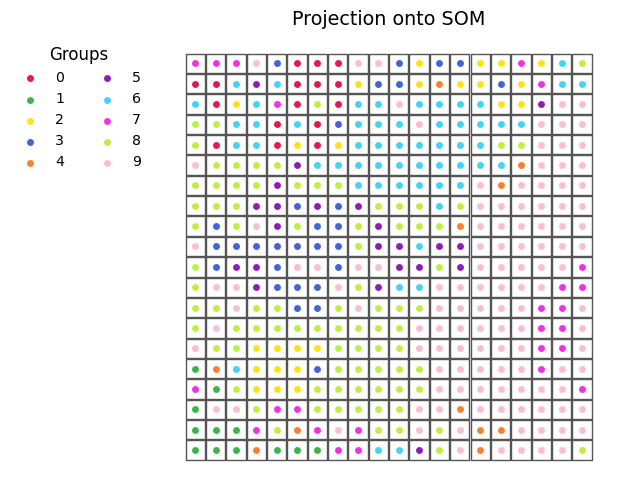

In [4]:
som.visualise(X, y)